# Image Classification Using CNN


I'll build a CNN using Keras to use it classifying thousands of pictures in six different categories

**Data-Set : https://www.kaggle.com/puneet6060/intel-image-classification**



### first to import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
%matplotlib inline

C:\Users\dell\AppData\Local\Programs\Python\Python39\lib\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.0.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [3]:
trainpath = 'D:\dell\Desktop\AI_files\Deep Learning materials\cnn\CNN-master\six categories\seg_train/'
testpath = 'D:\dell\Desktop\AI_files\Deep Learning materials\cnn\CNN-master\six categories\seg_test/'
predpath = 'D:\dell\Desktop\AI_files\Deep Learning materials\cnn\CNN-master\six categories\seg_pred/'


### Open Folders

now let's first check the Train folder to have a look to its content

In [4]:
for folder in  os.listdir(trainpath + 'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2191 in folder buildings
For training data , found 2271 in folder forest
For training data , found 2404 in folder glacier
For training data , found 2512 in folder mountain
For training data , found 2274 in folder sea
For training data , found 2382 in folder street


ok , how about the test folder

In [5]:
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 437 in folder buildings
For testing data , found 474 in folder forest
For testing data , found 553 in folder glacier
For testing data , found 525 in folder mountain
For testing data , found 510 in folder sea
For testing data , found 501 in folder street


_____
now for prediction folder

In [6]:
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


_____

# Checking Images

now we need to heck the images sizes , to know ow they looks like

since we have 6 categories , we first need to create a dictionary with their names & indices , also create a function to get the code back

In [6]:
code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

now how about the images sizes in train folder

In [7]:
size = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    13986
(113, 150, 3)        7
(111, 150, 3)        3
(135, 150, 3)        3
(144, 150, 3)        2
(123, 150, 3)        2
(142, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(134, 150, 3)        2
(136, 150, 3)        2
(108, 150, 3)        2
(105, 150, 3)        1
(97, 150, 3)         1
(131, 150, 3)        1
(147, 150, 3)        1
(81, 150, 3)         1
(145, 150, 3)        1
(141, 150, 3)        1
(100, 150, 3)        1
(103, 150, 3)        1
(76, 150, 3)         1
(120, 150, 3)        1
(102, 150, 3)        1
(119, 150, 3)        1
(133, 150, 3)        1
(115, 150, 3)        1
(124, 150, 3)        1
(110, 150, 3)        1
(149, 150, 3)        1
(140, 150, 3)        1
dtype: int64

______

ok , almost all of them are 150,150,3 , how about test images ? 

In [8]:
size = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str( testpath +'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    2993
(141, 150, 3)       1
(110, 150, 3)       1
(76, 150, 3)        1
(149, 150, 3)       1
(72, 150, 3)        1
(131, 150, 3)       1
(81, 150, 3)        1
dtype: int64

almost same ratios , now to prediction images 

In [9]:
size = []
files = gb.glob(pathname= str(predpath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(133, 150, 3)       1
(139, 150, 3)       1
(108, 150, 3)       1
(124, 150, 3)       1
(131, 150, 3)       1
(144, 150, 3)       1
(149, 150, 3)       1
(143, 150, 3)       1
(129, 150, 3)       1
(100, 150, 3)       1
(112, 150, 3)       1
(126, 150, 3)       1
(374, 500, 3)       1
dtype: int64

ok , since almost all of pictures are 150,150,3 , we can feel comfort in using all pictures in our model , after resizing it in a specific amount

# Reading Images

now it's time to read all images & convert it into arrays

first we'll create a variable s , which refer to size , so we can change it easily 

let's use now size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training

In [18]:
s = 100

now to read all pictues in six categories in training folder, ans use OpenCV to resize it , and not to forget to assign the y value , from the predefined function 

In [19]:
X_train = []
y_train = []
for folder in  os.listdir(trainpath +'seg_train') : 
    files = gb.glob(pathname= str( trainpath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_train.append(list(image_array))
        y_train.append(code[folder])

great , now how many items in X_train 

In [20]:
print(f'we have {len(X_train)} items in X_train')

we have 14034 items in X_train


also we have have a look to random pictures in X_train , and to adjust their title using the y value

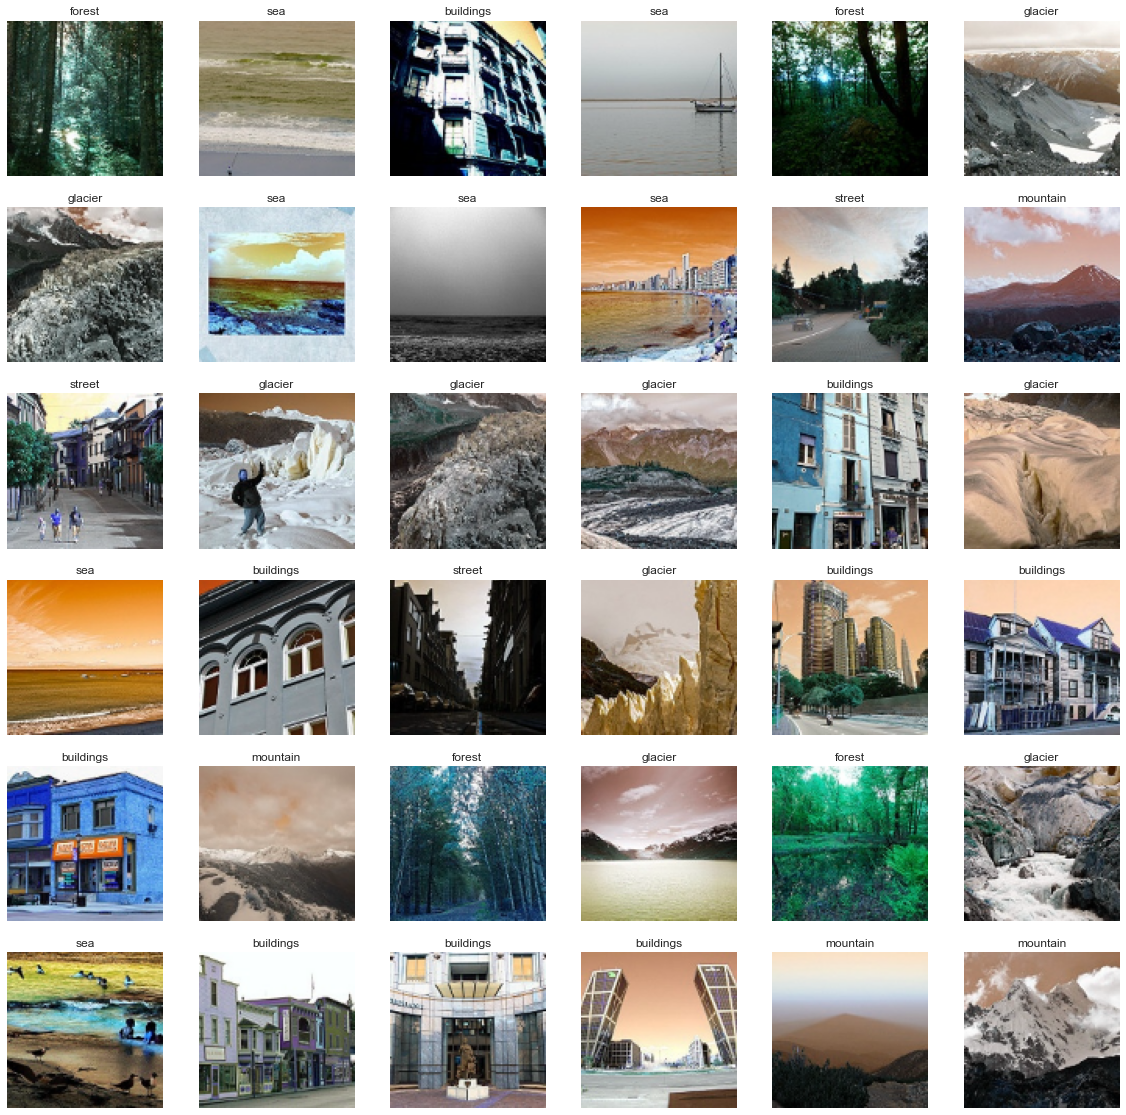

In [14]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_train),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_train[i])   
    plt.axis('off')
    plt.title(getcode(y_train[i]))

great , now to repeat same steps exactly in test data

In [21]:
X_test = []
y_test = []
for folder in  os.listdir(testpath +'seg_test') : 
    files = gb.glob(pathname= str(testpath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        X_test.append(list(image_array))
        y_test.append(code[folder])
        

In [22]:
print(f'we have {len(X_test)} items in X_test')

we have 3000 items in X_test


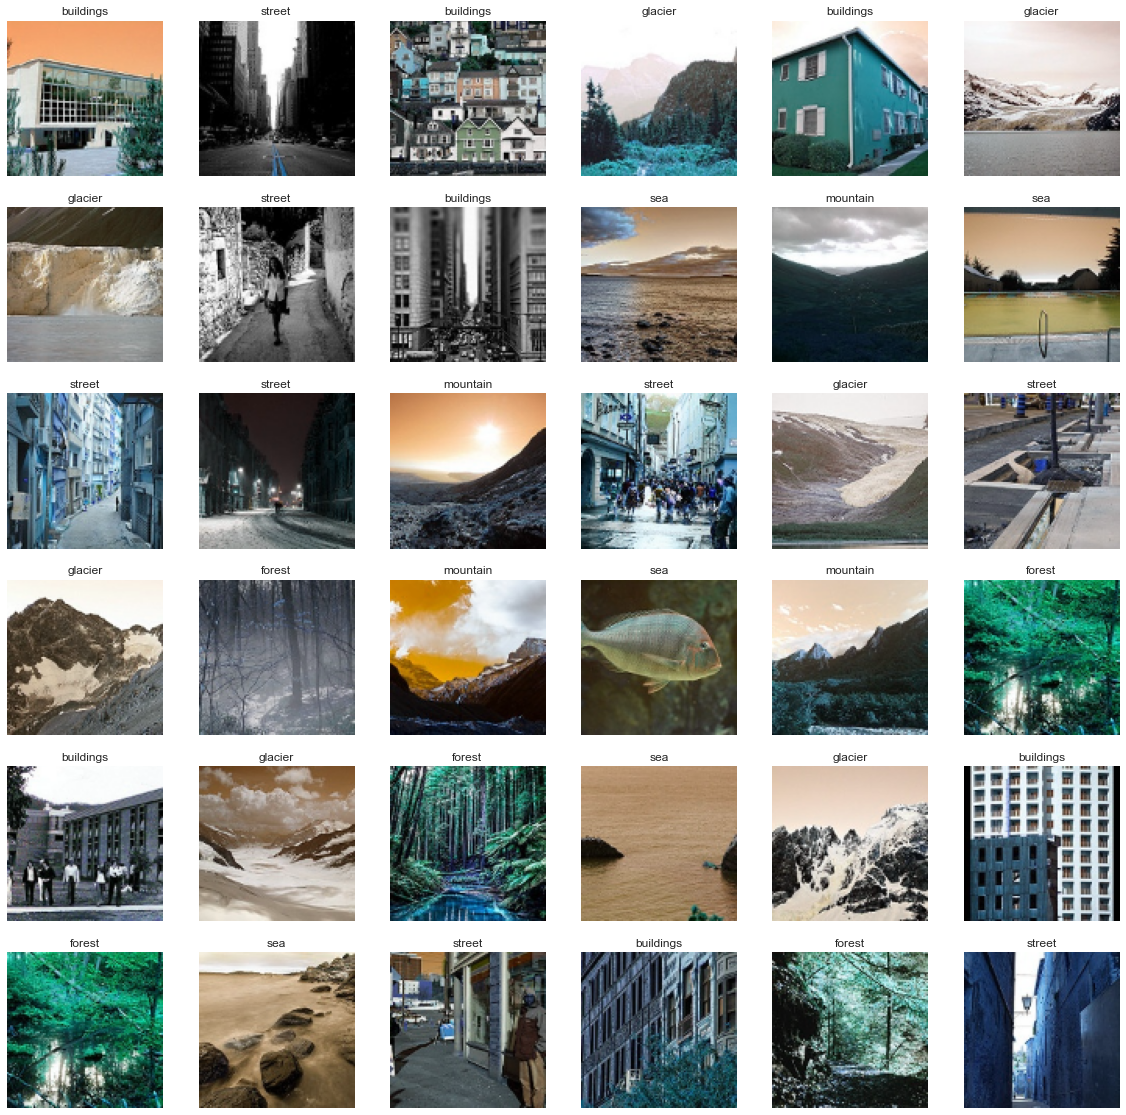

In [17]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_test),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_test[i])    
    plt.axis('off')
    plt.title(getcode(y_test[i]))

### also with Prediction data 

In [23]:
X_pred = []
files = gb.glob(pathname= str(predpath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    X_pred.append(list(image_array))       

In [24]:
print(f'we have {len(X_pred)} items in X_pred')

we have 7301 items in X_pred


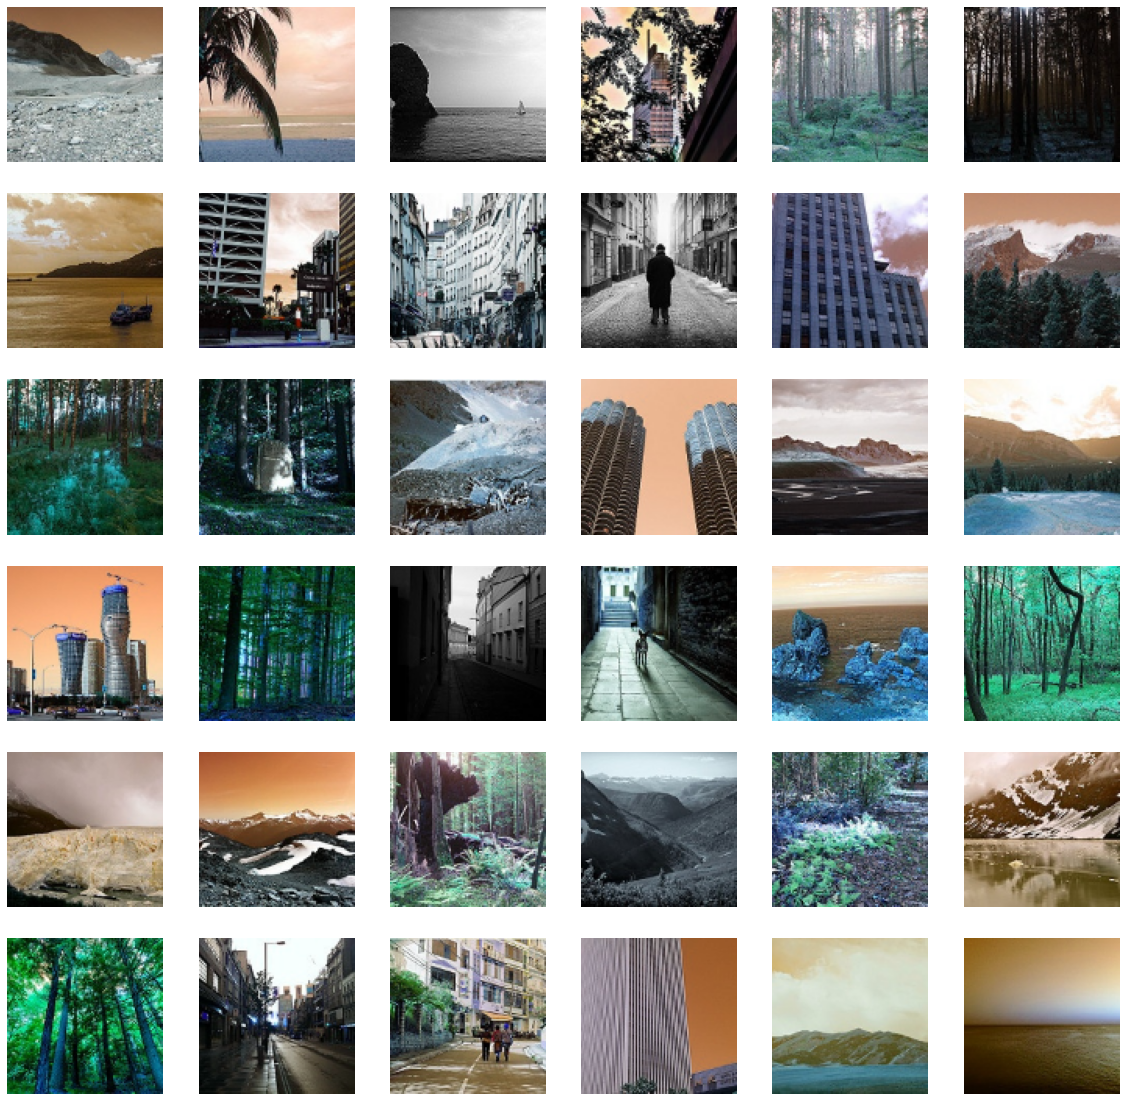

In [20]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')

________

# Building CNN Model 

now we need to build the model to train our data

first to convert the data into arrays using numpy

In [25]:
X_train = np.array(X_train)
X_test = np.array(X_test)
X_pred_array = np.array(X_pred)
y_train = np.array(y_train)
y_test = np.array(y_test)

print(f'X_train shape  is {X_train.shape}')
print(f'X_test shape  is {X_test.shape}')
print(f'X_pred shape  is {X_pred_array.shape}')
print(f'y_train shape  is {y_train.shape}')
print(f'y_test shape  is {y_test.shape}')

MemoryError: Unable to allocate 402. MiB for an array with shape (14034, 100, 100, 3) and data type uint8

now to build the CNN model by Keras , using Conv2D layers , MaxPooling & Denses

In [ ]:
KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

now to compile the model , using adam optimizer , & sparse categorical crossentropy loss

In [ ]:
KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

so how the model looks like ? 

In [ ]:
print('Model Details are : ')
print(KerasModel.summary())

now to train the model , lets use 50 epochs now

In [ ]:
epochs = 50
ThisModel = KerasModel.fit(X_train, y_train, epochs=epochs,batch_size=64,verbose=1)

how is the final loss & accuracy


In [ ]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(X_test, y_test)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

ok , only 80% accuracy & can be increased by tuning the hyperparameters



_______

now to predict X test

In [ ]:
y_pred = KerasModel.predict(X_test)

print('Prediction Shape is {}'.format(y_pred.shape))

great

now it's time to redict X Predict

In [ ]:
y_result = KerasModel.predict(X_pred_array)

print('Prediction Shape is {}'.format(y_result.shape))

and to show random redicted pictures & its predicting category


In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X_pred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X_pred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(y_result[i])))